# 키, 몸무게, 발 크기로 남자/여자를 알아맞출 수 있을까

In [2]:
import numpy as np # 수학 연산 수행을 위한 모듈
import pandas as pd # 데이터 처리를 위한 모듈
import seaborn as sns # 데이터 시각화 모듈
import matplotlib.pyplot as plt # 데이터 시각화 모듈 

## 1. 데이터 읽어오기

In [3]:
# CSV 파일 읽어오기
data_frame = pd.read_csv("../input/male-female/male_female.csv")

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
Id          30 non-null int64
Height      30 non-null int64
Weight      30 non-null int64
FeetSize    30 non-null int64
Year        30 non-null int64
Sex         30 non-null int64
dtypes: int64(6)
memory usage: 1.5 KB


In [5]:
data_frame.head(5)

,Id,Height,Weight,FeetSize,Year,Sex
0,1,166,57,240,1,0
1,2,178,92,265,1,1
2,3,167,80,270,1,1
3,4,168,52,245,2,1
4,5,155,60,235,2,0


In [6]:
def ShowCols (df):
    for col in df.columns: 
        print(col)

ShowCols(data_frame)

Id
Height
Weight
FeetSize
Year
Sex


## 2. 데이터 시각화

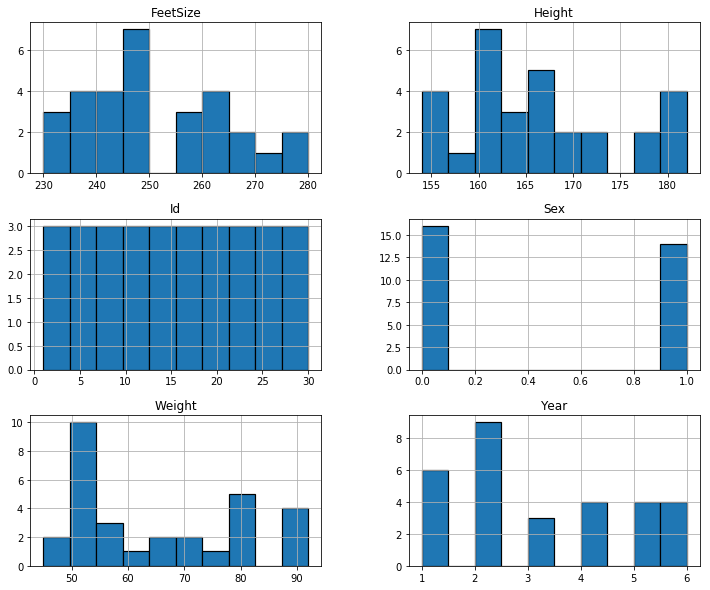

In [7]:
def ShowGraph (df):
    df.hist(edgecolor='black', linewidth=1.2)
    fig = plt.gcf()
    fig.set_size_inches(12,10)
    plt.show()

ShowGraph(data_frame)

> 키와 몸무게에 따라 남여 분포가 어떻게 되어있는지를 표시해보자. <br/>
> 여자는 오렌지 색으로, 남자는 파란색으로 표시. 

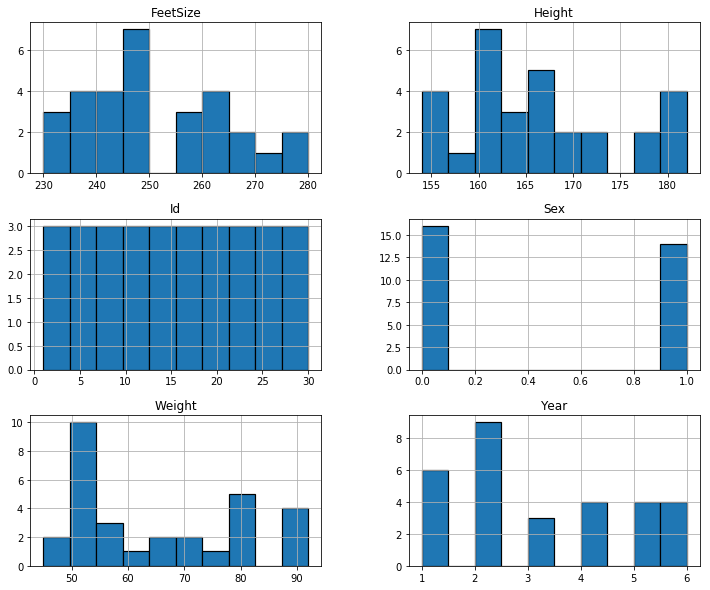

In [8]:
ShowGraph(data_frame)

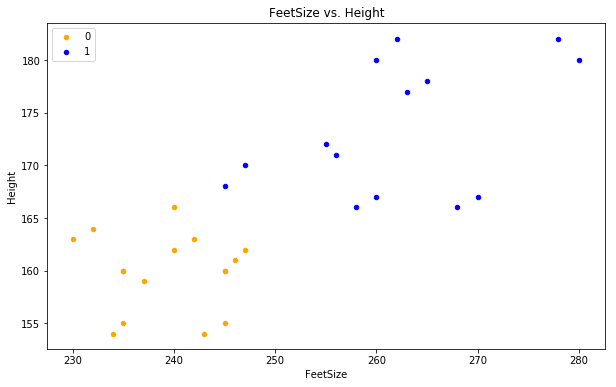

In [9]:
# 읽어온 데이터 표시하기
cl = data_frame['Sex'].unique()

col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

fig = data_frame[data_frame['Sex'] == cl[0]].plot(kind='scatter', x='FeetSize', y='Height', color=col[0], label=cl[0])

for i in range(len(cl)-1):
    data_frame[data_frame['Sex'] == cl[i+1]].plot(kind='scatter', x='FeetSize', y='Height', color=col[i+1], label=cl[i+1], ax=fig)

fig.set_xlabel('FeetSize')
fig.set_ylabel('Height')
fig.set_title('FeetSize' + " vs. " + 'Height')
fig=plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

[Text(0, 0.5, 'FeetSize'), Text(0.5, 0, 'Sex')]

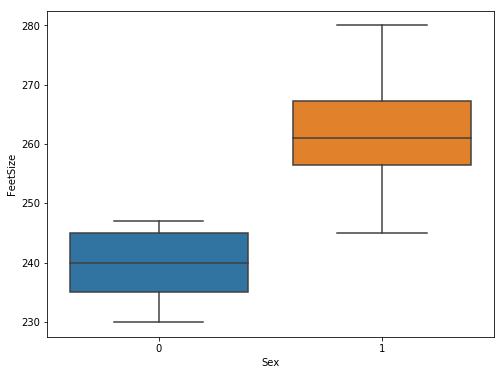

In [10]:
f, sub = plt.subplots(1, 1,figsize=(8,6))
sns.boxplot(x=data_frame['Sex'],y=data_frame['FeetSize'], ax=sub)
sub.set(xlabel='Sex', ylabel='FeetSize')

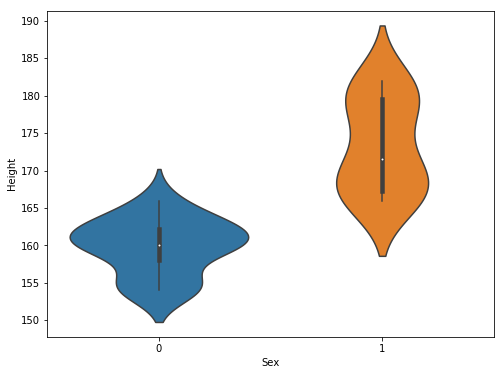

In [11]:
plt.figure(figsize=(8,6))
plt.subplot(1,1,1)
sns.violinplot(x='Sex',y='Height',data=data_frame)


[Text(0.5, 0, 'FeetSize'), Text(0.5, 0, 'Weight'), Text(0.5, 0, 'Height')]

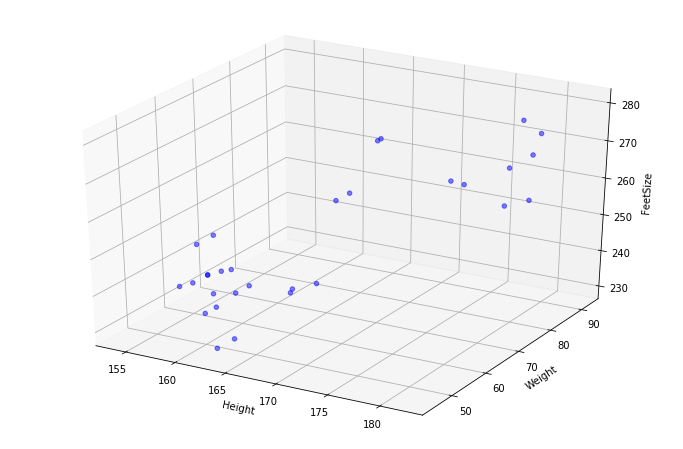

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(data_frame['Height'],data_frame['Weight'],data_frame['FeetSize'],c="blue",alpha=.5)
ax.set(xlabel='Height',ylabel='Weight',zlabel='FeetSize')

## 3. 학습용, 테스트용으로 데이터 나누기

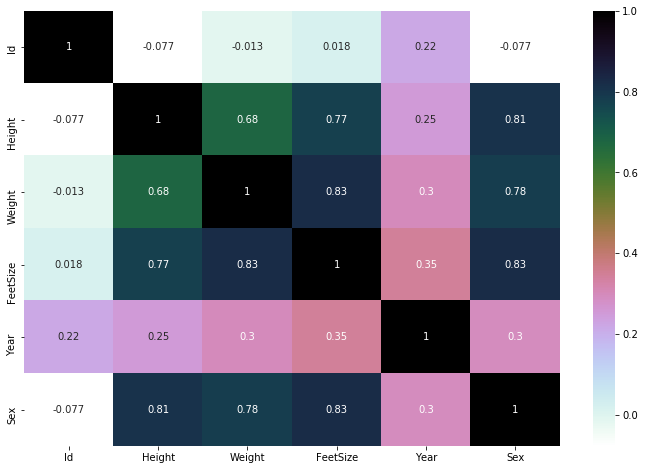

In [13]:
plt.figure(figsize=(12,8)) 
#heatmap: 각각 칼럼에 서로서로 얼마나 영향력이 있는지 퍼센트로 시각화함
sns.heatmap(data_frame.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [14]:
#모델을 불러옴
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(data_frame, test_size = 0.2)

# train=70% and test=30%
print(train.shape)
print(test.shape)

(24, 6)
(6, 6)


In [16]:
# 학습용 문제, 학습용 정답
train_X = train[['Height','FeetSize']] # 키와 발크기만 선택
train_y = train.Sex # 정답 선택

# 테스트용 문제, 테스트용 정답
test_X = test[['Height','FeetSize']] # taking test data features
test_y = test.Sex   #output value of test data

## 4. 머신러닝 모델 학습과 테스트

> **입력: 컬럼, 특징(features), 속성(attributes)** <br/>
> **정답: 목표값(target value, ground truth)**, 맞춰야 하는 정답

In [17]:
# 다양한 분류 알고리즘 패키지를 임포트함.
from sklearn.linear_model import LogisticRegression  # Logistic Regression 알고리즘
#from sklearn.cross_validation import train_test_split # 데이타 쪼개주는 모듈 

from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

### 4.1 써포트 벡터 머신(SVM) 알고리즘 이용하여 알아맞추기

In [18]:
gildong = svm.SVC()
gildong.fit(train_X,train_y) # 가르친 후
prediction = gildong.predict(test_X) # 얼마나 맞히는지 테스트

rate1 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate1))

인식률: 66.7


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 4.2 논리 회귀(Logistic Regression) 알고리즘 이용하여 알아맞추기

In [19]:
cheolsu = LogisticRegression()
cheolsu.fit(train_X,train_y)
prediction = cheolsu.predict(test_X)

rate2 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate2))

인식률: 50.0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.3 결정 트리(Decision Tree) 알고리즘 이용하여 알아맞추기

In [20]:
youngja = DecisionTreeClassifier()
youngja.fit(train_X,train_y)
prediction = youngja.predict(test_X)

rate3 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate3))


인식률: 83.3


### 4.4 근접 이웃(K-Nearest Neighbours) 알고리즘 이용하여 알아맞추기 

In [21]:
minsu = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
minsu.fit(train_X,train_y)
prediction = minsu.predict(test_X)

rate4 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate4))

인식률: 100.0


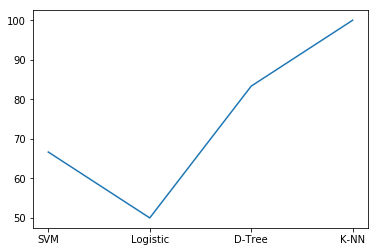

In [22]:
plt.plot(['SVM','Logistic','D-Tree','K-NN'], [rate1, rate2, rate3, rate4])

> 키와 발 사이즈 이외에 몸무게 정보(특징)을 더 이용하면 어떨까?

In [23]:
train_X = train[['Height','FeetSize','Weight']] # 키와 발크기뿐만 아니라 몸무게도 추가
train_y = train.Sex # 정답 선택

test_X = test[['Height','FeetSize','Weight']] # taking test data features
test_y = test.Sex   #output value of test data

## 5. 결론

* 데이터를 분석하고, 상관관계를 이해할 수 있다. <br/>
* 4가지 머신러닝 알고리즘을 이용하여 학습을 시키고 테스트를 수행할 수 있다. <br/> 
* 특징을 2개만 이용할 때보다는 3개를 이용할 때가 성능은 향상되었다. <br/>